<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques that are used to avoid overfitting (but haven't practiced them yet). In this project, we'll practice a fundamental method for avoiding overfitting that is commonly referred to as: _train/test split validation_. 

This is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we will be splitting the data into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California, 20 percent data from elsewhere, and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case, we've still overfit on our data set because we did not sufficiently randomize the data.

Note: In a situation like this, you could use a technique called _k-fold cross-validation_, which is cross-validation applied to more than two subsets. In particular, in k-fold cross-validation, you'd partition your data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. You would do this for each of the possible $k-1$ subsets.

# Project Requirements

The goal of this project will be to create a test-training split to compare multiple models on the same Boston housing data set. For example, you might choose to compare different linear models on the same data.

In this project, you'll fit two to three different models on the Boston housing data. For example, you could pick two different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Work with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train your model on the training data.
* Evaluate your model on the test data.
* Repeat with other variables.
* Rank the models by how well they score on the testing data set. 
* Don't forget to interpret your findings! 



A k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression

As a real estate developer, you are being asked to model the median home price of various houses in the city of Boston using data from the US census. Your goal is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose



In [20]:
import matplotlib.pyplot as plt

%matplotlib inline




In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### REQUIRED: Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it _ought_ to be pretty clean, but you should always perform exploratory data analysis.

In [22]:
X.isnull().sum()

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [23]:
y.isnull().sum()

MEDV    0
dtype: int64

In [24]:
X.index

RangeIndex(start=0, stop=506, step=1)

In [25]:
y.index

RangeIndex(start=0, stop=506, step=1)

In [26]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [27]:
y.dtypes

MEDV    float64
dtype: object

In [28]:
X.shape

(506, 13)

In [29]:
y.shape

(506, 1)

In [30]:
X.nunique().sort_values(ascending=False)

CRIM       504
LSTAT      455
RM         446
DIS        412
B          357
AGE        356
NOX         81
INDUS       76
TAX         66
PTRATIO     46
ZN          26
RAD          9
CHAS         2
dtype: int64

In [31]:
y.nunique().sort_values(ascending=False)

MEDV    229
dtype: int64

In [32]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [33]:
y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


## Using `scikit-learn` Linear Regression

### REQUIRED: Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict your target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [67]:
lreg = LinearRegression()

In [68]:
import pandas as pd

In [69]:
X = X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)

y = pd.DataFrame(boston.target, 
                 columns=['MEDV'])

In [70]:
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
lreg.score(X, y)

0.7406426641094095

In [73]:
import seaborn as sns

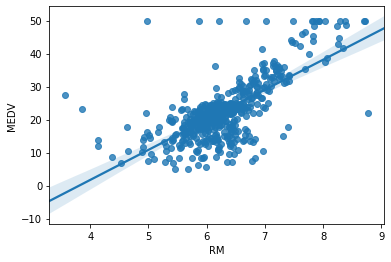

In [78]:
sns.regplot(x=X['RM'], y=y['MEDV'], data=boston.data)

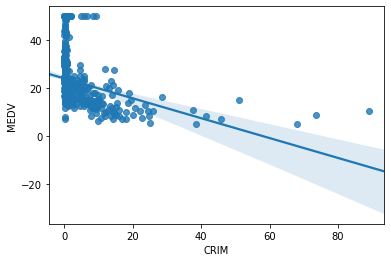

In [77]:
sns.regplot(x=X['CRIM'], y=y['MEDV'], data=boston.data)

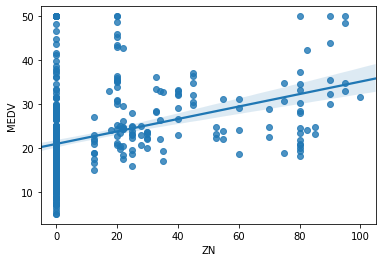

In [79]:
sns.regplot(x=X['ZN'], y=y['MEDV'], data=boston.data)

In [ ]:
#Explanation: I really struggled with regressing individual variables (individual X columns of the dataframe) against
#y. For some reason I was only able to regress all of the X columns at once against y and see the overall impact
#X has on y. I guess in class I focused a lot on multiple columns and had trouble dialing it back and zeroing
#in on one column
#Please see below for the error I received when trying to fit a single column like RM as X on y
#However I was able to chart the individual variables RM, CRIM, and ZN on MEDV. It looks like RM is highly 
#positively correlated to the median value. More rooms typically lead to higher values. CRIM looks very negatively
#correlated with values, so lower crime leads to higher values. ZN or proportion of land zoned for over 25k sq ft
#seems to be uncorrelated with value.

In [60]:
X = X['RM']
y = y['MEDV']

In [61]:
lreg.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.854 6.101 7.929 5.877
 6.319 6.402 5.875 5.88  5.572 6.416 5.859 6.546 6.02  6.315 6.86  6.98
 7.765 6.144 7.155 6.563 5.604 6.153 7.831 6.782 6.556 7.185 6.951 6.739
 7.178 6.8   6.604 7.875 7.287 7.107 7.274 6.975 7.135 6.162 7.61  7.853
 8.034 5.891 6.326 5.783 6.064 5.344 5.96  5.404 5.807 6.375 5.412 6.182
 5.888 6.642 5.951 6.373 6.951 6.164 6.879 6.618 8.266 8.725 8.04  7.163
 7.686 6.552 5.981 7.412 8.337 8.247 6.726 6.086 6.631 7.358 6.481 6.606
 6.897 6.095 6.358 6.393 5.593 5.605 6.108 6.226 6.433 6.718 6.487 6.438
 6.957 8.259 6.108 5.876 7.454 8.704 7.333 6.842 7.203 7.52  8.398 7.327
 7.206 5.56  7.014 8.297 7.47  5.92  5.856 6.24  6.538 7.691 6.758 6.854
 7.267 6.826 6.482 6.812 7.82  6.968 7.645 7.923 7.088 6.453 6.23  6.209
 6.315 6.565 6.861 7.148 6.63  6.127 6.009 6.678 6.549 5.79  6.345 7.041
 6.871 6.59  6.495 6.982 7.236 6.616 7.42  6.849 6.635 5.972 4.973 6.122
 6.023 6.266 6.567 5.705 5.914 5.782 6.382 6.113 6.426 6.376 6.041 5.708
 6.415 6.431 6.312 6.083 5.868 6.333 6.144 5.706 6.031 6.316 6.31  6.037
 5.869 5.895 6.059 5.985 5.968 7.241 6.54  6.696 6.874 6.014 5.898 6.516
 6.635 6.939 6.49  6.579 5.884 6.728 5.663 5.936 6.212 6.395 6.127 6.112
 6.398 6.251 5.362 5.803 8.78  3.561 4.963 3.863 4.97  6.683 7.016 6.216
 5.875 4.906 4.138 7.313 6.649 6.794 6.38  6.223 6.968 6.545 5.536 5.52
 4.368 5.277 4.652 5.    4.88  5.39  5.713 6.051 5.036 6.193 5.887 6.471
 6.405 5.747 5.453 5.852 5.987 6.343 6.404 5.349 5.531 5.683 4.138 5.608
 5.617 6.852 5.757 6.657 4.628 5.155 4.519 6.434 6.782 5.304 5.957 6.824
 6.411 6.006 5.648 6.103 5.565 5.896 5.837 6.202 6.193 6.38  6.348 6.833
 6.425 6.436 6.208 6.629 6.461 6.152 5.935 5.627 5.818 6.406 6.219 6.485
 5.854 6.459 6.341 6.251 6.185 6.417 6.749 6.655 6.297 7.393 6.728 6.525
 5.976 5.936 6.301 6.081 6.701 6.376 6.317 6.513 6.209 5.759 5.952 6.003
 5.926 5.713 6.167 6.229 6.437 6.98  5.427 6.162 6.484 5.304 6.185 6.229
 6.242 6.75  7.061 5.762 5.871 6.312 6.114 5.905 5.454 5.414 5.093 5.983
 5.983 5.707 5.926 5.67  5.39  5.794 6.019 5.569 6.027 6.593 6.12  6.976
 6.794 6.03 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### REQUIRED: Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.
Score and plot both of these approaches. How do your metrics change? What does this tell us about the size of training/testing splits? Include a written response.

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
lreg = LinearRegression()

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
X = X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)

y = pd.DataFrame(boston.target, 
                 columns=['MEDV'])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [10]:
lreg.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
lreg.score(X_test, y_test)

0.6993476299341777

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2020)

In [13]:
lreg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lreg.score(X_test, y_test)

0.7596805341491608

In [ ]:
#Written response: My score without creating the training sets was 0.74, with 70% for training it dropped to
#0.699 and with 90% for training it jumped all the way to 0.76. This tells me that even though this dataset
#isn't too complicated overall, there are some irregularities or outliers in the data that will cause the 
#r squared value to drop when using a smaller section for training and testing on it. It makes me think
#that if we tested on out of sample data, the r squared could drop a decent amount. But when we used
#90% for training the score jumped a little, so there was a small benefit for training on most of the set but 
#not all of it. Maybe got lucky there and excluded some irregular data in training.

## BONUS: Try the k-fold cross-validation technique described above, varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds? Include a written response.

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
scores = cross_val_score(estimator = lreg, X=X_train, y = y_train, cv=5)

In [17]:
scores    

array([0.69797338, 0.66295821, 0.57996746, 0.77472119, 0.81202791])

In [24]:
scores = cross_val_score(estimator = lreg, X=X_train, y = y_train, cv=10)

In [25]:
scores 

array([0.74443399, 0.60300338, 0.63664726, 0.67068728, 0.72070553,
       0.45735731, 0.75689891, 0.78097644, 0.84717018, 0.79865641])

In [26]:
scores.max()

0.8471701834528845

In [ ]:
#I think by adding more folds and increasing the number of validation test and as a result testing on different section
#of data that may have different outliers/irregularites, we now have a range of r squared values that show
#how we would fare on out of sample data. When only 5 folds, the lowest score is 0.58 and the highest is 0.81.
#Now we have a better sense of the floor of the model, where the score can drop all the way down to 0.58
#depending on what slice of data the training is done on. But the score can go all the way up to 0.81, which
#exceeds all previous scores (which previously maxed out at 0.76). This could be the ceiling of the model but
#it might just be a clean section of data leading to this.
#I liked the 10 folds results, because we saw the floor could go all the way down to 0.46, which is much lower
#than the lowest score with 5 folds. Now we get a better sense of how much predictive ability of the model
#can suffer with out of sample data. I think this last gives a sense that the average is around 0.7, and the 
#ceiling is only a little higher at 0.84. This probably gives a reasonable average score we could expect 
#with out of sample data, which is lower than the highest scores I achieved in the previous example without
#folds

## BONUS
Practice the same workflow you just worked through above, but this time use Statsmodels instead of Sklearn for linear regression. See example formulas below.

### Example: Statsmodels Formulas

Adjust the formula using your chosen metrics from the housing data. Remember, your workflow here is the same, but the syntax is a little different. Describe your results. Are they comparable to scikit-learn's regression models?

In [8]:
# First, format your data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# Set up your new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          1.59e-321
Time:                        22:28:38   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BONUS:

Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

### BONUS:

Given a combination of predictors, can you identify another response variable that could be accurately predicted through the exploration of different predictors in this data set?

_Tip: Consider pairplots, coefficients, or Pearson scores._

In [10]:
# Check out variable relations
import seaborn as sns

In [ ]:
# Check out Pearson scores


## BONUS/DEMO: Up for an additional challenge? Try again, this time using the `patsy` library.

You can read more about it here: https://patsy.readthedocs.io/en/latest/

In [11]:
import patsy

# Use the patsy library to run a regression model on the housing dataset
